##Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

##Data Collection & Pre-Processing

In [ ]:
!wget -O data.csv https://drive.google.com/uc?id=1uzbhec5TW_OjFr4UUZkoMm0rpyvYdhZw&export=download

--2022-06-28 13:31:30--  https://drive.google.com/uc?id=1uzbhec5TW_OjFr4UUZkoMm0rpyvYdhZw
Resolving drive.google.com (drive.google.com)... 108.177.119.113, 108.177.119.139, 108.177.119.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tpa2ge22ahat2q32ugbu695cd6jcsf4v/1656423075000/13966379820454708749/*/1uzbhec5TW_OjFr4UUZkoMm0rpyvYdhZw [following]
--2022-06-28 13:31:30--  https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tpa2ge22ahat2q32ugbu695cd6jcsf4v/1656423075000/13966379820454708749/*/1uzbhec5TW_OjFr4UUZkoMm0rpyvYdhZw
Resolving doc-0k-4k-docs.googleusercontent.com (doc-0k-4k-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-0k-4k-docs.googleusercontent.com (doc-0k-4k-docs.googleusercontent.com)|142.250.1

In [ ]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('data.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

##Label Encoding

In [ ]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:
# separating the data as texts and label

X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


##Splitting the data into training data & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


##Feature Extraction

Trước hết ta cần dùng feature extraction chuyển nội dung message dạng text sang dạng number để model có thể train được. Có nhiều phương pháp để thực hiện feature extraction như Bag of words, TF-IDF, Hashing ...

Ở đây, mình đã liệt kê cả 3 phương pháp là CountVectorizer, TfidfVectorizer và HashingVectorizer để thử nghiệm như sau

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

# CountVectorizer
# feature_extraction = CountVectorizer(ngram_range = (1,2), stop_words='english')

# TfidfVectorizer
# feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english'. lowercase='True')

# HasingVectorizer
feature_extraction = HashingVectorizer(n_features=200000,norm=None, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 12093)	-1.0
  (0, 20661)	-1.0
  (0, 74451)	1.0
  (0, 82897)	-1.0
  (0, 131446)	1.0
  (1, 7442)	1.0
  (1, 13784)	1.0
  (1, 17620)	1.0
  (1, 56201)	-1.0
  (1, 59403)	-1.0
  (1, 59422)	1.0
  (1, 70722)	-1.0
  (1, 82897)	-1.0
  (1, 92061)	-1.0
  (1, 109279)	1.0
  (1, 166253)	1.0
  (1, 187701)	1.0
  (2, 41965)	-1.0
  (2, 115725)	-1.0
  (2, 120587)	-1.0
  (2, 136579)	1.0
  (3, 37820)	1.0
  (3, 43438)	1.0
  (4, 8903)	1.0
  (4, 13984)	1.0
  :	:
  (4454, 168311)	1.0
  (4454, 180827)	1.0
  (4455, 1246)	1.0
  (4455, 16064)	-1.0
  (4455, 26357)	-1.0
  (4455, 33647)	1.0
  (4455, 53500)	-1.0
  (4455, 59197)	-1.0
  (4455, 74451)	1.0
  (4455, 130333)	1.0
  (4455, 148376)	1.0
  (4455, 180348)	-1.0
  (4455, 182221)	1.0
  (4456, 10225)	1.0
  (4456, 13766)	1.0
  (4456, 19308)	2.0
  (4456, 22940)	-1.0
  (4456, 43438)	2.0
  (4456, 52723)	-1.0
  (4456, 63301)	1.0
  (4456, 74647)	1.0
  (4456, 76219)	1.0
  (4456, 105690)	1.0
  (4456, 121644)	1.0
  (4456, 186395)	2.0


##Training the Model

###Logistic Regression

Logistic regression là một phương pháp phân tích thống kê được sử dụng để dự đoán giá trị dữ liệu dựa trên các quan sát trước đó của tập dữ liệu.
Mục đích là ước tính xác suất của các sự kiện, bao gồm xác định mối quan hệ giữa các tính năng từ đó đự đoán xác suất của các kết quả


Lý do dùng Logistic Regression:
Vì nó là cách tốt nhất để xử lý Binary Classification (vì data ta chia làm 2 class chỉ gồm spam và ham email)


In [ ]:
model = LogisticRegression(warm_start=True)

In [ ]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression(warm_start=True)

In [ ]:
# save the model to disk
pickle.dump(model, open('logistic_regression.pkl', 'wb'))
pickle.dump(feature_extraction, open('feature_extraction.pkl', 'wb'))

##Evaluating the trained model

###Accuracy Score

Cách đơn giản và hay được sử dụng nhất là accuracy (độ chính xác). Cách đánh giá này đơn giản tính tỉ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [ ]:
print("ACCURACY SCORE")
print("Training Set:", accuracy_score(y_true=Y_train, y_pred=model.predict(X_train_features)) * 100, "%")
print("Testing Set:", accuracy_score(y_true=Y_test, y_pred=model.predict(X_test_features)) * 100, "%")

ACCURACY SCORE
Training Set: 99.46152120260264 %
Testing Set: 97.9372197309417 %


###Confusion Matrix

Confusion Matrix: Là một phương pháp đánh giá kết quả của những bài toán phân loại với việc xem xét cả những chỉ số về độ chính xác và độ bao quát của các dự đoán cho từng lớp. Một confusion matrix gồm 4 chỉ số sau đối với mỗi lớp phân loại:
- TP: số lượng dự đoán chính xác
- TN: số lượng dự đoán chính xác một cách gián tiếp
- FP: số lượng các dự đoán sai lệch
- FN: số lượng các dự đoán sai lệch một cách gián tiếp

Bảng dự đoán sẽ như thế này:

TP | FP

._________.

FN | TN

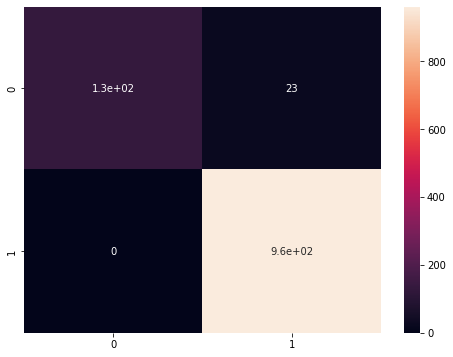

In [ ]:
matrix = confusion_matrix(y_true=Y_test, y_pred=model.predict(X_test_features))

plt.figure(figsize=(8,6))
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")
sns.heatmap(matrix, annot=True)
plt.show()

###Classification Report

Từ các chỉ số trên của Confusion Matrix, ta có thể đánh giá dựa trên nhiều yếu tố khác nhau như là:
- Precision: tỉ lệ số điểm true positive trong số những điểm được phân loại là positive

Precision = TP / (TP + FP)
- Recall: tỉ lệ số điểm true positive trong số những điểm thực sự là positive

Recall = TP / (TP + FN)
- F1-score: harmonic mean của precision và recall 

F1-score = (2 * precision * recall) / (precision + recall)

In [ ]:
print("CLASSIFICATION REPORT")
print(classification_report(y_true=Y_test, y_pred=model.predict(X_test_features)))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



##Building a Predictive System

In [ ]:
input_mail = [
              "Bring everyone to the same page  - \nIt's more productive work together",
              "MongoDB Cheat Sheet!  - \nHi Duy, MongoDB is really complex. There are tons of commands available, but you really only need to know a few. That is why I created this cheat sheet. I wanted to sum up all the important",
              "[VNG] Thư cảm ơn người tham dự VNG x Thách Thức Tour  - \nThân chào bạn, Lời đầu tiên, BTC gửi đến bạn lời cảm ơn chân thành vì đã nhiệt tình tham gia chương trình VNG x Thách Thức Tour diễn ra vào ngày 31/05 vừa rồ",
              "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
              ]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)

for i in range(len(prediction)):
    if prediction[i] == 1:
        print(f"Mail {i + 1} is ham")
    else:
        print(f"Mail {i + 1} is spam")

[1 1 1 0]
Mail 1 is ham
Mail 2 is ham
Mail 3 is ham
Mail 4 is spam
